# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data
- Voted가 현재 1,2로 되어있는데, 0,1로 보기 위해 -1을 해준다.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/심리_성향_예측_Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/심리_성향_예측_Data/test_x.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/심리_성향_예측_Data/sample_submission.csv')

# 실행 화면에 보이는 행,열 갯수 설정
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
display(train.head(10))
print(train.columns)

train['voted'] = train['voted'] - 1 # Voted가 현재 1,2로 되어있는데, 0,1로 보기 위해 -1을 해준다

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
5,5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,2.0,1258,5.0,1451,1.0,1029,3.0,1633,1.0,2254,5.0,1984,1.0,1158,3.0,1194,3.0,483,1.0,983,1.0,817,5.0,1052,1.0,1354,1.0,747,2.0,1826,40s,2,1,6,Female,1,3,White,Other,5,5,5,4,5,3,3,7,5,3,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,2.0,549,5.0,390,4.0,1601,5.0,1312,1.0,1699,4.0,1229,4.0,1175,1.0,1078,4.0,341,5.0,635,2.0,1448,4.0,838,4.0,765,3.0,1954,1.0,1482,20s,2,1,3,Male,1,1,White,Atheist,2,4,3,5,1,1,3,2,1,5,2,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1
7,7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,1.0,483,1.0,592,1.0,2020,5.0,6022,5.0,2090,4.0,1767,5.0,982,5.0,1576,1.0,782,3.0,911,5.0,417,1.0,392,5.0,1510,1.0,842,1.0,1138,30s,2,1,1,Male,1,1,White,Christian_Other,3,6,0,0,0,0,0,1,2,6,2,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1
8,8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,2.0,1322,5.0,1014,5.0,3014,3.0,3771,3.0,13295,5.0,3605,3.0,9265,4.0,2531,1.0,812,4.0,2595,5.0,1227,5.0,1837,4.0,1218,4.0,9923,5.0,1631,20s,4,2,0,Female,2,1,Other,Christian_Other,1,1,2,1,2,2,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
9,9,2.0,1668,1.0,866,1.0,895,1.0,1308,2.0,1715,5.0,563,5.0,574,1.0,1406,5.0,1698,3.0,1354,5.0,774,1.0,1299,1.0,810,5.0,327,1.0,646,1.0,957,4.0,850,5.0,693,1.0,1313,1.0,986,50s,3,1,3,Female,1,1,White,Christian_Other,0,1,1,2,0,3,0,4,1,5,2,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1


Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')


## 데이터 설명 : 
- https://www.dacon.io/competitions/official/235647/talkboard/401534?page=1&dtype=recent&ptype=pub

#### Q_A : 질문에 대한 응답
#### Q_E : 질문에 응답하기까지 걸린 시간
#### age_group : 연령
#### education : 교육 수준? 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답
#### engnat : 모국어가 영어? (1=Yes, 2=No, 0=무응답)
#### familysize : 형제자매 수
#### gender : 성별 (Male, Female)
#### hand : 필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)
#### married : 혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)
#### race : 인종 (Asian, Arab, Black, Indigenous Australian, Native American, White, Other)
#### religion : 종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other)
#### tp__ :  items were rated "I see myself as:" _____ such that
- tp01 : Extraverted, enthusiastic.
- tp02 : Critical, quarrelsome.
- tp03 : Dependable, self-disciplined.
- tp04 : Anxious, easily upset.
- tp05 : Open to new experiences, complex.
- tp06 : Reserved, quiet.
- tp07 : Sympathetic, warm.
- tp08 : Disorganized, careless.
- tp09 : Calm, emotionally stable.
- tp10 : Conventional, uncreative.

#### urban : 유년기의 거주 구역 (1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)
#### wr_(01~13) : 실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)
#### wf_(01~03) : 허구인 단어의 정의를 앎 (1=Yes, 0=No)
#### voted (타겟): 지난 해 국가 선거 투표 여부 (1=Yes, 2=No) -> (0 = yes, 1 = No)

- Mean-encoding 관련

https://dailyheumsi.tistory.com/120

#### 결측치 검사

- train 결측치 없음

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

- test 결측치 없음

In [ ]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  int64  
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  int64  
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  int64  
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  int64  
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  int64  
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  int64  
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  int64  
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  int64  
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  int64  
 19  QjA         11383 non-nul

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1


In [ ]:
# 원본 데이터 보존하기 위해 복사하기
final_train = train.copy()
final_test = test.copy()

# Q_A 데이터 살펴보기
- Q_A : 질문에 대한 응답
- 방법 1 : 데이터가 1,2,3,4,5로 된 Categorical Data이다. => Mean_Encoding이나 One-hot Encoding이 필요할 것 같다.
    - 데이터별 응답의 편차가 심하므로, Mean-Encoding을 적용하면 각각의 특징이 더 잘 나타날 것 같다.

In [ ]:
QA_columns = list(train.loc[:, train.columns[1:41:2]].columns) # Q_A 피쳐 이름 추출
train_QA = train.loc[:,QA_columns] # Q_A피쳐 열만 추출

display(train_QA.head())
display(train_QA.describe())

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
0,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0
1,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0
2,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0
3,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
4,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0


,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
count,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,2.904463,3.662347,1.749078,2.317952,2.168145,2.560595,2.317952,3.157691,3.575529,3.813933,4.325727,3.509620,2.632896,3.217232,3.071752,2.840464,2.823487,3.432948,3.225687
std,1.196952,1.566142,1.431494,1.043625,1.369205,1.348653,1.510600,1.460813,1.481740,1.361220,1.372551,1.146992,1.375134,1.473022,1.476414,1.489744,1.404342,1.424383,1.374938,1.521603
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,5.000000,4.000000,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,3.000000,4.000000,5.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Q_A subplot 시각화

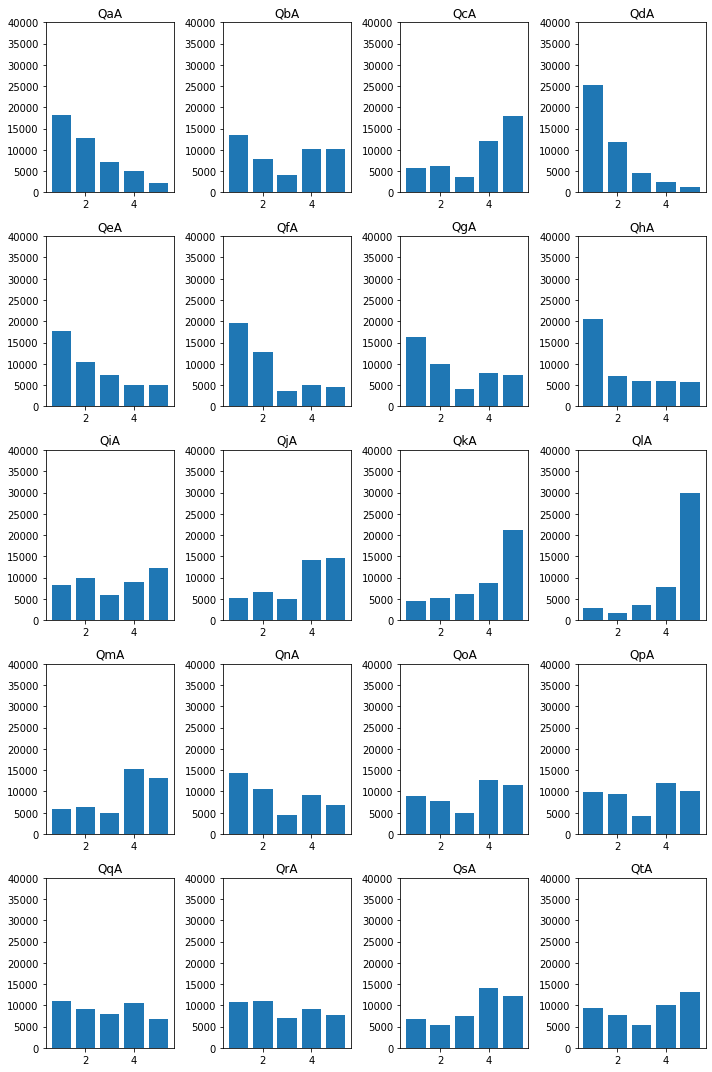

In [ ]:
fig,ax = plt.subplots(5,4, figsize=(10,15)) # subplots(행,열) : 여러개의 subplot 

for i in range(20):
    x_num = i//4
    y_num = i%4

    plot_dict = train_QA.iloc[:,i].value_counts().to_dict()
    x_values = sorted(plot_dict.keys())
    y_values = [plot_dict[x] for x in x_values]
    
    ax[x_num, y_num].bar(x_values, y_values)
    ax[x_num, y_num].set_title(train_QA.columns[i])
    ax[x_num, y_num].set_ylim(0,40000)
plt.tight_layout()
plt.show()

#### Mean_Encoding 후 final 데이터에 넣기



In [ ]:
train_QA['voted'] = train['voted'] # train_QA에 투표여부 클래스 열 추가

# 
for c in QA_columns:
    mean_df = train_QA.groupby(c)['voted'].agg('mean') # 반복문으로 각 QA열을 QA_열 기준 그룹객체 만들고 voted열의 평균을 구함
    # groupby(피쳐): 피쳐기준 그룹객체 만듦 
    #  agg(함수): 여러개의 함수를 여러 각 원소에 적용 

    # 각 Q_A 값들 평균 train, test 데이터에 대입
    final_train[c] = train[c].map(mean_df) # map(함수) : 로 각 원소에 대입
    final_test[c] = test[c].map(mean_df)
    
display(final_train.head())

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,0.563033,363,0.557456,1370,0.574759,997,0.549449,1024,0.538197,1577,0.522300,539,0.53021,586,0.565925,1095,0.502607,1142,0.539209,1287,0.541250,883,0.529442,851,0.498594,851,0.517668,816,0.513205,579,0.514485,924,0.578074,366,0.541311,876,0.520566,633,0.469089,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,0.500437,647,0.627831,1313,0.570634,3387,0.544993,2969,0.537259,4320,0.585859,2190,0.56513,826,0.514670,4082,0.502607,1867,0.578543,1264,0.506491,2943,0.529442,3927,0.467587,4329,0.517668,1828,0.498814,1214,0.603592,2414,0.454372,1356,0.572475,3039,0.538763,4304,0.469089,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,0.494825,1623,0.487898,1480,0.499742,1021,0.561308,3374,0.538739,1333,0.568371,531,0.52278,1167,0.514670,1016,0.596880,2653,0.495968,1569,0.506491,998,0.555001,2547,0.498594,918,0.503868,2153,0.513205,1304,0.483372,1131,0.454372,937,0.520620,1327,0.491370,1170,0.469089,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,0.563033,504,0.561204,2311,0.530138,992,0.548998,3245,0.537259,357,0.523605,1519,0.52278,159,0.594746,2275,0.502607,2809,0.539209,5614,0.591645,3219,0.529442,1296,0.553238,9046,0.503868,1216,0.540300,1169,0.561011,23868,0.563144,581,0.520620,8830,0.538763,2392,0.597725,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,0.564892,927,0.487898,707,0.574759,556,0.537439,1062,0.537259,1014,0.523605,628,0.56513,991,0.514670,1259,0.502607,1153,0.596835,1388,0.506491,740,0.555001,1181,0.553238,547,0.546196,575,0.498814,754,0.561011,1140,0.454372,323,0.527810,1070,0.491370,583,0.519367,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


# Q_E 데이터 살펴보기
- describe : 데이터가 편차가 매우 커보임
- kdeplot : 극값이 매우 많음이 확인되었다. => 이상치로 판단하고 제거 
    - QaE는 중간 값 없이 극값만 존재 / QlE는 극값쪽에도 많은 데이터 보유 등 한번에 처리할 경우 결과가 안좋아질 수 있음.
    - QaE, QbE, QqE, QrE의 극값은 x.clip을 통해 제거하도록 한다.


In [ ]:
QE_columns = list(train.loc[:, train.columns[2:41:2]].columns) # Q_E 피쳐 이름 추출

# Q_E 데이터 train, test 에서 추출
train_QE = train.loc[:,QE_columns] 
test_QE = test.loc[:,QE_columns]

display(train_QE.head())
display(train_QE.describe())

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
0,363,1370,997,1024,1577,539,586,1095,1142,1287,883,851,851,816,579,924,366,876,633,1115
1,647,1313,3387,2969,4320,2190,826,4082,1867,1264,2943,3927,4329,1828,1214,2414,1356,3039,4304,1346
2,1623,1480,1021,3374,1333,531,1167,1016,2653,1569,998,2547,918,2153,1304,1131,937,1327,1170,1409
3,504,2311,992,3245,357,1519,159,2275,2809,5614,3219,1296,9046,1216,1169,23868,581,8830,2392,1312
4,927,707,556,1062,1014,628,991,1259,1153,1388,740,1181,547,575,754,1140,323,1070,583,1889


,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
count,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04
mean,9.453570e+02,2.189589e+03,1484.294518,1.490672e+03,1.899292e+03,1.850650e+03,1.284608e+03,4.584272e+03,4.068434e+03,2.576363e+03,2.038986e+03,3.741018e+03,2.050287e+03,959.880502,1.435762e+03,1.633479e+03,1.154352e+03,2.470808e+03,1.164117e+03,2.240057e+03
std,1.307565e+04,3.351027e+04,8977.664318,1.092260e+04,1.670765e+04,7.608236e+04,9.756584e+03,5.020265e+05,1.141738e+05,5.411432e+04,3.069164e+04,3.663672e+05,7.530787e+04,5869.964127,1.084997e+04,2.600221e+04,2.250689e+04,1.482890e+05,7.433515e+03,6.730924e+04
min,2.500000e+01,2.500000e+01,25.000000,2.600000e+01,2.500000e+01,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,25.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,2.500000e+01
25%,4.040000e+02,8.750000e+02,651.000000,6.790000e+02,8.340000e+02,5.040000e+02,5.490000e+02,1.077000e+03,1.259000e+03,9.020000e+02,8.590000e+02,8.060000e+02,6.500000e+02,428.000000,6.380000e+02,7.060000e+02,4.610000e+02,7.940000e+02,5.270000e+02,7.330000e+02
50%,5.570000e+02,1.218000e+03,899.000000,9.310000e+02,1.154000e+03,7.120000e+02,7.720000e+02,1.464000e+03,1.800000e+03,1.260000e+03,1.178000e+03,1.125000e+03,9.060000e+02,596.000000,8.830000e+02,9.700000e+02,6.520000e+02,1.117000e+03,7.470000e+02,1.020000e+03
75%,8.270000e+02,1.838000e+03,1335.000000,1.355000e+03,1.656000e+03,1.078000e+03,1.150000e+03,2.090000e+03,2.761000e+03,1.899000e+03,1.721000e+03,1.649000e+03,1.342000e+03,891.000000,1.300000e+03,1.409000e+03,9.820000e+02,1.664000e+03,1.124000e+03,1.526000e+03
max,2.413960e+06,5.580395e+06,871557.000000,1.552821e+06,1.919926e+06,1.176370e+07,1.068252e+06,1.070860e+08,1.703586e+07,9.910006e+06,4.824953e+06,7.754351e+07,1.410832e+07,606694.000000,1.309739e+06,4.650742e+06,4.277510e+06,3.159328e+07,1.286581e+06,1.155650e+07


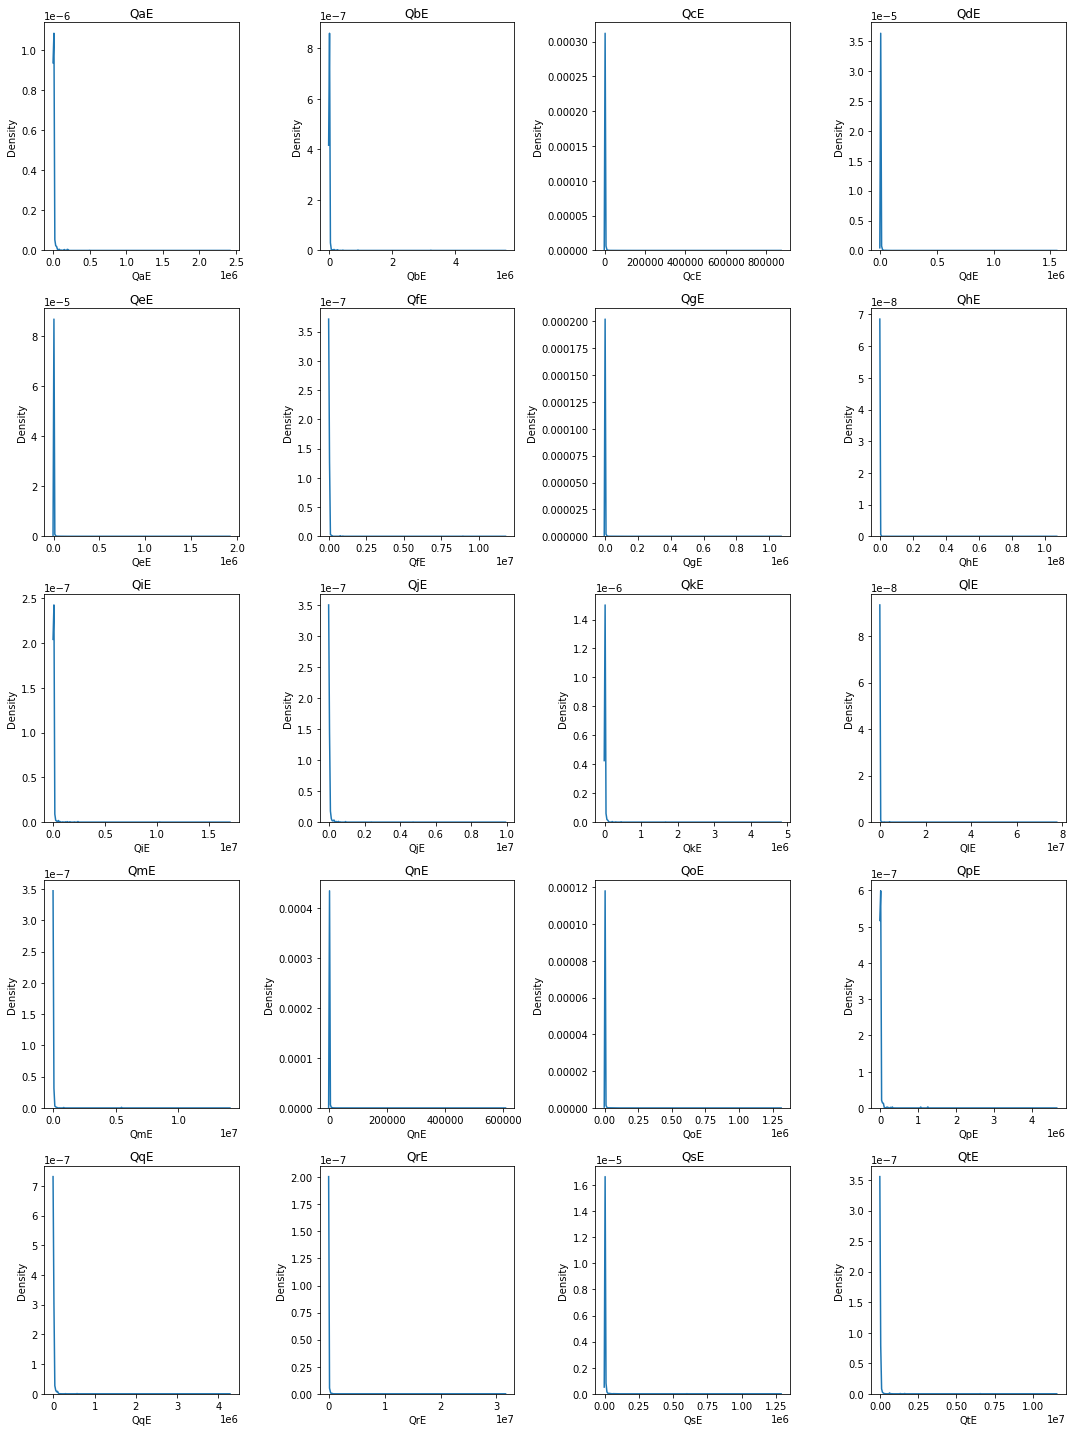

In [ ]:
fig,ax = plt.subplots(5,4, figsize=(15,20))

for i in range(20):
    x_num = i//4
    y_num = i%4
    
    ax[x_num, y_num] = sns.kdeplot(train_QE.iloc[:,i], ax = ax[x_num][y_num])
    ax[x_num, y_num].set_title(train_QE.columns[i])
plt.tight_layout()
plt.show()

#### QaE, QbE, QqE, QrE의 이상치 제거 -> 95%

In [ ]:
'''outlier_columns = ['QaE','QbE','QqE','QrE']
fig,ax = plt.subplots(4,2, figsize=(10,15))
changed_train_QE = train_QE.loc[:,outlier_columns].apply(lambda x: x.clip(x.quantile(.00), x.quantile(.95)), axis=0)
for i in range(8):
    x_num = i//2
    y_num = i%2
    column = outlier_columns[i//2]
    if i %2 == 0:
        ax[x_num,y_num] = sns.kdeplot(train_QE.loc[:,column], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('RAW_'+column)
    else:
        
        ax[x_num,y_num] = sns.kdeplot(changed_train_QE.loc[:,column], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('CHANGED_'+column)
plt.tight_layout()
plt.show()

train_QE.loc[:,outlier_columns] = changed_train_QE'''

"outlier_columns = ['QaE','QbE','QqE','QrE']\nfig,ax = plt.subplots(4,2, figsize=(10,15))\nchanged_train_QE = train_QE.loc[:,outlier_columns].apply(lambda x: x.clip(x.quantile(.00), x.quantile(.95)), axis=0)\nfor i in range(8):\n    x_num = i//2\n    y_num = i%2\n    column = outlier_columns[i//2]\n    if i %2 == 0:\n        ax[x_num,y_num] = sns.kdeplot(train_QE.loc[:,column], ax = ax[x_num][y_num])\n        ax[x_num,y_num].set_title('RAW_'+column)\n    else:\n        \n        ax[x_num,y_num] = sns.kdeplot(changed_train_QE.loc[:,column], ax = ax[x_num][y_num])\n        ax[x_num,y_num].set_title('CHANGED_'+column)\nplt.tight_layout()\nplt.show()\n\ntrain_QE.loc[:,outlier_columns] = changed_train_QE"

#### 로그변환
kdeplot : 데이터의 편차가 매우 큰 것이 보인다. -> 로그변환

In [ ]:
'''fig,ax = plt.subplots(10,4, figsize=(10,15))
changed_train_QE = np.log1p(train_QE)
columns = train_QE.columns
for i in range(40):
    column = columns[i//2]
    x_num = i // 4
    y_num = i % 4
    
    if i % 2 == 0:
        ax[x_num,y_num] = sns.kdeplot(train_QE.iloc[:,i//2], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('RAW_'+column)
    else:
        ax[x_num,y_num] = sns.kdeplot(changed_train_QE.iloc[:,i//2], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('CHANGED_'+column)
plt.tight_layout()
plt.show()

train_QE.loc[:,columns] = changed_train_QE'''

"fig,ax = plt.subplots(10,4, figsize=(10,15))\nchanged_train_QE = np.log1p(train_QE)\ncolumns = train_QE.columns\nfor i in range(40):\n    column = columns[i//2]\n    x_num = i // 4\n    y_num = i % 4\n    \n    if i % 2 == 0:\n        ax[x_num,y_num] = sns.kdeplot(train_QE.iloc[:,i//2], ax = ax[x_num][y_num])\n        ax[x_num,y_num].set_title('RAW_'+column)\n    else:\n        ax[x_num,y_num] = sns.kdeplot(changed_train_QE.iloc[:,i//2], ax = ax[x_num][y_num])\n        ax[x_num,y_num].set_title('CHANGED_'+column)\nplt.tight_layout()\nplt.show()\n\ntrain_QE.loc[:,columns] = changed_train_QE"

#### MinMaxScaler 변환

- Q_E 데이터는 편차가 심하고  데이터 값이 커서 MinMaxScaler 로 0~1 사이 변환 

- QE 데이터 추출

In [ ]:
# Q_E 데이터 추출

# QE train
QE_train = train.iloc[:,2:42:2] # Q_E 데이터 추출
display(QE_train.head()) 

# QE test
QE_test = test.iloc[:,2:42:2] # Q_E 데이터 추출
display(QE_test.head())

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
0,363,1370,997,1024,1577,539,586,1095,1142,1287,883,851,851,816,579,924,366,876,633,1115
1,647,1313,3387,2969,4320,2190,826,4082,1867,1264,2943,3927,4329,1828,1214,2414,1356,3039,4304,1346
2,1623,1480,1021,3374,1333,531,1167,1016,2653,1569,998,2547,918,2153,1304,1131,937,1327,1170,1409
3,504,2311,992,3245,357,1519,159,2275,2809,5614,3219,1296,9046,1216,1169,23868,581,8830,2392,1312
4,927,707,556,1062,1014,628,991,1259,1153,1388,740,1181,547,575,754,1140,323,1070,583,1889


,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
0,736,2941,4621,4857,2550,3171,3613,1494,1597,8891,2416,2043,3445,1232,1152,1447,798,1054,3462,1621
1,514,1952,1552,821,1150,605,601,2370,2268,1759,771,1124,4525,559,988,1014,380,995,629,708
2,500,2507,480,614,1326,767,799,1309,3317,766,1940,926,568,608,669,2417,710,2781,1110,1073
3,669,1050,1435,2252,2533,578,742,2886,1379,1392,2855,697,573,412,1076,1445,1069,847,1126,1240
4,499,1243,845,1666,925,413,361,995,1427,1093,1201,1264,943,475,787,607,529,947,524,1945


train 데이터 변환

In [ ]:
# train 데이터 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # MinMaxScaler 함수
scaler.fit(QE_train) # fit
print(scaler.transform(QE_train)) # MinMaxScaler 변환 시킴

final_train.iloc[:,2:42:2] = scaler.transform(QE_train) # 변환된 데이터 대입

final_train.head()

[[1.40020340e-04 2.41023445e-04 1.11527747e-03 ... 2.69361258e-05
  4.72579507e-04 9.43193857e-05]
 [2.57670567e-04 2.30809068e-04 3.85757494e-03 ... 9.54000978e-05
  3.32593373e-03 1.14308173e-04]
 [6.61989656e-04 2.60735399e-04 1.14281518e-03 ... 4.12113230e-05
  8.89972920e-04 1.19759660e-04]
 ...
 [2.35300453e-04 1.49094056e-04 1.17264771e-03 ... 5.55181724e-05
  1.03376767e-03 5.55532529e-05]
 [2.99096703e-04 2.34034661e-04 9.94799961e-04 ... 5.23845925e-05
  5.53415475e-04 9.50981696e-05]
 [1.95117101e-04 3.22917656e-04 8.36458099e-04 ... 2.25048008e-05
  4.99006650e-04 1.41911736e-04]]


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,0.563033,0.000140,0.557456,0.000241,0.574759,0.001115,0.549449,0.000643,0.538197,0.000808,0.522300,0.000044,0.53021,0.000525,0.565925,0.000010,0.502607,0.000067,0.539209,0.000130,0.541250,0.000183,0.529442,0.000011,0.498594,0.000059,0.517668,0.001304,0.513205,0.000442,0.514485,0.000199,0.578074,0.000086,0.541311,0.000027,0.520566,0.000473,0.469089,0.000094,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,0.500437,0.000258,0.627831,0.000231,0.570634,0.003858,0.544993,0.001895,0.537259,0.002237,0.585859,0.000184,0.56513,0.000750,0.514670,0.000038,0.502607,0.000110,0.578543,0.000128,0.506491,0.000610,0.529442,0.000050,0.467587,0.000305,0.517668,0.002972,0.498814,0.000927,0.603592,0.000519,0.454372,0.000317,0.572475,0.000095,0.538763,0.003326,0.469089,0.000114,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,0.494825,0.000662,0.487898,0.000261,0.499742,0.001143,0.561308,0.002156,0.538739,0.000681,0.568371,0.000043,0.52278,0.001069,0.514670,0.000009,0.596880,0.000156,0.495968,0.000158,0.506491,0.000207,0.555001,0.000033,0.498594,0.000063,0.503868,0.003508,0.513205,0.000996,0.483372,0.000243,0.454372,0.000219,0.520620,0.000041,0.491370,0.000890,0.469089,0.000120,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,0.563033,0.000198,0.561204,0.000410,0.530138,0.001110,0.548998,0.002073,0.537259,0.000173,0.523605,0.000127,0.52278,0.000125,0.594746,0.000021,0.502607,0.000165,0.539209,0.000566,0.591645,0.000667,0.529442,0.000016,0.553238,0.000639,0.503868,0.001963,0.540300,0.000893,0.561011,0.005132,0.563144,0.000136,0.520620,0.000279,0.538763,0.001840,0.597725,0.000111,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,0.564892,0.000374,0.487898,0.000122,0.574759,0.000609,0.537439,0.000667,0.537259,0.000515,0.523605,0.000051,0.56513,0.000904,0.514670,0.000012,0.502607,0.000068,0.596835,0.000140,0.506491,0.000153,0.555001,0.000015,0.553238,0.000037,0.546196,0.000907,0.498814,0.000576,0.561011,0.000245,0.454372,0.000076,0.527810,0.000033,0.491370,0.000434,0.519367,0.000161,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


test 데이터 변환

In [ ]:
# test 데이터 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # MinMaxScaler 함수
scaler.fit(QE_test) # fit
print(scaler.transform(QE_test)) # MinMaxScaler 변환 시킴

final_test.iloc[:,2:42:2] = scaler.transform(QE_test) # 변환된 데이터 대입

final_test.head()

[[4.73087328e-03 5.41099700e-04 1.26528536e-04 ... 1.21421540e-04
  3.88705487e-03 1.21129682e-03]
 [3.25164248e-03 3.57326484e-04 4.20017453e-05 ... 1.14411881e-04
  6.83090237e-04 5.17498832e-04]
 [3.15835765e-03 4.60455033e-04 1.24765840e-05 ... 3.26602556e-04
  1.22707435e-03 7.94866047e-04]
 ...
 [4.00458428e-03 1.43079248e-04 1.96099952e-05 ... 8.09080905e-05
  3.64164000e-04 8.69337244e-04]
 [3.41822252e-03 3.82969259e-04 1.27106921e-04 ... 5.19665181e-04
  5.04401069e-04 1.40051446e-03]
 [3.43154893e-03 1.61846785e-04 1.82879731e-05 ... 9.58778694e-05
  3.55908109e-03 2.54189955e-03]]


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,0.563033,0.004731,0.522095,0.000541,0.570634,0.000127,0.549449,0.002443,0.538197,0.001595,0.515232,0.004085,0.53372,0.002708,0.558376,0.005503,0.531064,0.000162,0.495968,0.002680,0.506491,0.000408,0.559207,0.001027,0.563659,0.009529,0.517668,0.005599,0.560556,0.000527,0.561011,0.001121,0.563144,0.000526,0.520620,0.000121,0.491370,0.003887,0.519367,0.001211,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,0.563033,0.003252,0.522095,0.000357,0.570634,0.000042,0.548998,0.000401,0.534566,0.000709,0.568371,0.000779,0.53021,0.000434,0.514670,0.008788,0.502607,0.000232,0.578543,0.000524,0.506491,0.000127,0.555001,0.000558,0.563659,0.012516,0.578459,0.002477,0.513205,0.000450,0.588181,0.000779,0.484087,0.000241,0.527810,0.000114,0.543511,0.000683,0.565911,0.000517,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.563033,0.003158,0.522095,0.000460,0.530138,0.000012,0.537439,0.000297,0.538197,0.000821,0.523605,0.000988,0.56513,0.000583,0.514670,0.004810,0.555589,0.000341,0.539209,0.000224,0.541250,0.000327,0.555001,0.000458,0.553238,0.001571,0.546196,0.002705,0.608421,0.000301,0.588181,0.001888,0.563144,0.000466,0.520620,0.000327,0.543511,0.001227,0.597725,0.000795,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,0.564892,0.004284,0.487898,0.000190,0.574759,0.000039,0.537439,0.001125,0.538739,0.001585,0.568371,0.000745,0.56513,0.000540,0.514670,0.010722,0.583262,0.000140,0.461014,0.000413,0.591645,0.000483,0.555001,0.000341,0.553238,0.001585,0.578459,0.001795,0.513205,0.000491,0.561011,0.001120,0.454372,0.000710,0.572475,0.000097,0.538763,0.001245,0.469089,0.000922,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,0.540892,0.003152,0.487898,0.000226,0.574759,0.000023,0.537439,0.000829,0.538197,0.000567,0.523605,0.000532,0.53372,0.000252,0.514670,0.003633,0.555589,0.000145,0.578543,0.000323,0.506491,0.000201,0.529442,0.000630,0.498594,0.002608,0.503868,0.002088,0.513205,0.000356,0.561011,0.000458,0.563144,0.000343,0.520620,0.000109,0.538763,0.000564,0.559764,0.001458,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1


#### final_train에 변환 된 데이터 넣기

In [ ]:
#final_train.loc[:,QE_columns] = train_QE

#### final_test에도 같은 작업 

In [ ]:
'''test_QE.loc[:,outlier_columns] = test_QE.loc[:,outlier_columns].apply(lambda x: x.clip(x.quantile(.00), x.quantile(.95)), axis=0)
final_train.loc[:,QE_columns] = np.log1p(train_QE)'''

'test_QE.loc[:,outlier_columns] = test_QE.loc[:,outlier_columns].apply(lambda x: x.clip(x.quantile(.00), x.quantile(.95)), axis=0)\nfinal_train.loc[:,QE_columns] = np.log1p(train_QE)'

# age_group : 연령
- 그룹 : ['+70s', '10s', '20s', '30s', '40s', '50s', '60s'] 
- 50, 60, 70대 이상의 데이터가 현저히 부족해보임 
- 이후 Mean_Encoding 진행

In [ ]:
'''# age_group 라벨 인코딩하고 시각화
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # LabelEncoder 함수

le.fit(train['age_group']) # 라벨인코딩 변환

display(le.classes_) # 그룹들 이름 출력'''

"# age_group 라벨 인코딩하고 시각화\nfrom sklearn import preprocessing\nle = preprocessing.LabelEncoder() # LabelEncoder 함수\n\nle.fit(train['age_group']) # 라벨인코딩 변환\n\ndisplay(le.classes_) # 그룹들 이름 출력"

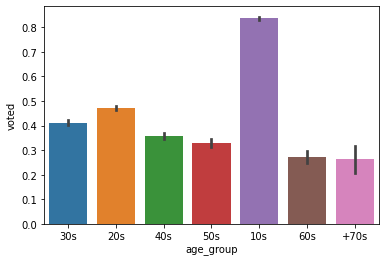

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# age_group과 voted 시각화
sns.barplot(x='age_group',y='voted', data=train) # age_group과 voted 시각화
plt.show()

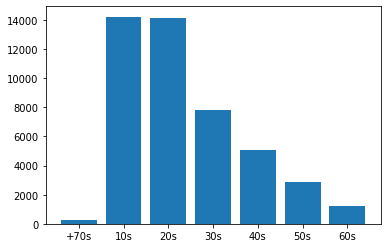

,age_group,voted
0,+70s,0.263830
1,10s,0.837214
2,20s,0.469671
3,30s,0.411179
4,40s,0.357949
5,50s,0.329872
6,60s,0.271357


"\ntrain.age_group = train.age_group.apply(lambda x : '+60s' if x in ['60s','+70s'] else x)\nplot_dict = train.loc[:,'age_group'].value_counts().to_dict()\nx_values = sorted(plot_dict.keys())\ny_values = [plot_dict[x] for x in x_values]\nplt.bar(x_values,y_values)\nplt.show()"

In [ ]:
plot_dict = train.loc[:,'age_group'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
plt.bar(x_values,y_values)
plt.show()
display(train.groupby('age_group')['voted'].agg('mean').reset_index())
'''
train.age_group = train.age_group.apply(lambda x : '+60s' if x in ['60s','+70s'] else x)
plot_dict = train.loc[:,'age_group'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
plt.bar(x_values,y_values)
plt.show()'''

#### mean_encoding 후 합치기

In [ ]:
# mean_encoding 
mean_df = train.groupby('age_group')['voted'].agg('mean') # groupby('age_group')으로 그룹 객체 만들고 그중['voted'] 열에만 agg('mean')로 각 원소에 mean 함수 적용
display(mean_df)

# train 데이터 합치기
display(train['age_group'].map(mean_df)) # 매핑된 age_group 확인 출력

final_train['age_group'] = train['age_group'].map(mean_df)  # 매핑된 age_group final_train에 대입
print(final_train.info())

# test 데이터 합치기
display(test['age_group'].map(mean_df)) # 매핑된 age_group 확인 출력
final_test['age_group'] = test['age_group'].map(mean_df)  # 매핑된 age_group final_test 데이터에 대입
print(final_test.info())

age_group
+70s    0.263830
10s     0.837214
20s     0.469671
30s     0.411179
40s     0.357949
50s     0.329872
60s     0.271357
Name: voted, dtype: float64

0        0.411179
1        0.469671
2        0.411179
3        0.469671
4        0.469671
           ...   
45527    0.837214
45528    0.411179
45529    0.837214
45530    0.357949
45531    0.469671
Name: age_group, Length: 45532, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  float64
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  float64
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  float64
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  float64
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  float64
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  float64
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  float64
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  float64
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  float64
 19  QjA         45532 non-nul

0        0.837214
1        0.837214
2        0.411179
3        0.271357
4        0.837214
           ...   
11378    0.469671
11379    0.837214
11380    0.411179
11381    0.357949
11382    0.469671
Name: age_group, Length: 11383, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  float64
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  float64
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  float64
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  float64
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  float64
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  float64
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  float64
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  float64
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  float64
 19  QjA         11383 non-nul

In [ ]:
'''mean_df = train.groupby('age_group')['voted'].agg('mean')
display(mean_df)
final_train['age_group'] = train['age_group'].map(mean_df)

final_test.age_group = final_test.age_group.apply(lambda x : '+60s' if x in ['60s','+70s'] else x)
final_test['age_group'] = final_test['age_group'].map(mean_df)'''

"mean_df = train.groupby('age_group')['voted'].agg('mean')\ndisplay(mean_df)\nfinal_train['age_group'] = train['age_group'].map(mean_df)\n\nfinal_test.age_group = final_test.age_group.apply(lambda x : '+60s' if x in ['60s','+70s'] else x)\nfinal_test['age_group'] = final_test['age_group'].map(mean_df)"

# Education
- Mean Encoding 진행
- 1=고졸 미만, 2=고졸, 3=대학 재학, 4=대학 졸업, 0=무응답

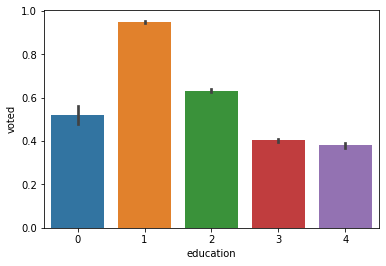

In [ ]:
# Education, voted 시각화
sns.barplot(x='education',y='voted',data=train)

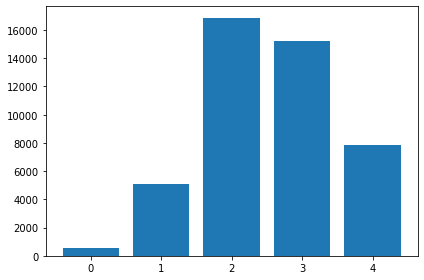

In [ ]:
plot_dict = train.loc[:,'education'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
x_names = ['0','1','2', '3', '4']
plt.bar(x_names,y_values)
plt.tight_layout()
plt.show()

#### mean 인코딩 후 데이터 합치기

In [ ]:
## mean 인코딩
mean_df = train.groupby('education')['voted'].agg('mean')
display(mean_df)

## 인코딩된 데이터 train, test 데이터에 매핑
display(train['education'].map(mean_df)) # 매핑 확인 출력
final_train['education'] = train['education'].map(mean_df) # final_train 대입
final_test['education'] = train['education'].map(mean_df) # final_test 대입


education
0    0.522727
1    0.950275
2    0.632967
3    0.403494
4    0.380316
Name: voted, dtype: float64

0        0.632967
1        0.380316
2        0.403494
3        0.380316
4        0.403494
           ...   
45527    0.632967
45528    0.632967
45529    0.632967
45530    0.380316
45531    0.632967
Name: education, Length: 45532, dtype: float64

In [ ]:
'''mean_df = train.groupby('education')['voted'].agg('mean')
display(mean_df)
final_train['education'] = train['education'].map(mean_df)
final_test['education'] = test['education'].map(mean_df)'''

"mean_df = train.groupby('education')['voted'].agg('mean')\ndisplay(mean_df)\nfinal_train['education'] = train['education'].map(mean_df)\nfinal_test['education'] = test['education'].map(mean_df)"

# Engnat
- 데이터 확인 후 큰 차이가 없다면, 데이터 삭제 => 0,1,2 사이에 어느정도 유의미한 차이가 있는 것으로 보임 => MeanEncoding
- 1=영어권, 2=비영어권, 0=무응답

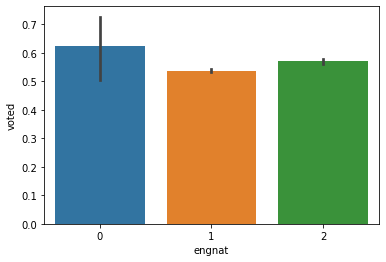

In [ ]:
# engnat, voted 시각화
sns.barplot(x='engnat',y='voted',data=train)

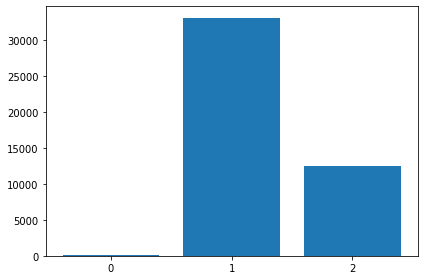

In [ ]:
plot_dict = train.loc[:,'engnat'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
x_names = ['0','1','2']
plt.bar(x_names,y_values)
plt.tight_layout()
plt.show()

#### mean 인코딩 후 데이터 합치기

In [ ]:
# mean encoding
mean_df = train.groupby('engnat')['voted'].agg('mean') # groupby('engnat')으로 그룹 객체 만들고 그중['voted'] 열에만 agg('mean')로 각 원소에 mean 함수 적용
display(mean_df)


## 인코딩된 데이터 train, test 데이터에 매핑
display(train['engnat'].map(mean_df)) # 매핑 확인 출력
final_train['engnat'] = train['engnat'].map(mean_df) # final_train 대입
final_test['engnat'] = train['engnat'].map(mean_df) # final_test 대입

engnat
0    0.623377
1    0.537397
2    0.571394
Name: voted, dtype: float64

0        0.537397
1        0.571394
2        0.537397
3        0.571394
4        0.537397
           ...   
45527    0.537397
45528    0.537397
45529    0.537397
45530    0.537397
45531    0.537397
Name: engnat, Length: 45532, dtype: float64

In [ ]:
'''mean_df = train.groupby('engnat')['voted'].agg('mean')
display(mean_df)
final_train['engnat'] = train['engnat'].map(mean_df)
final_test['engnat'] = test['engnat'].map(mean_df)'''

"mean_df = train.groupby('engnat')['voted'].agg('mean')\ndisplay(mean_df)\nfinal_train['engnat'] = train['engnat'].map(mean_df)\nfinal_test['engnat'] = test['engnat'].map(mean_df)"

# Familysize
- 이상치가 상당수 보이며, 11명 이상은 각각 데이터가 너무 적어 신뢰하기 힘들어 보임 => 11명 이상은 11로 통합
- 가족은 숫자로 되어있으나, 사실상 Categorical Data이기 때문에, MeanEncoding 진행

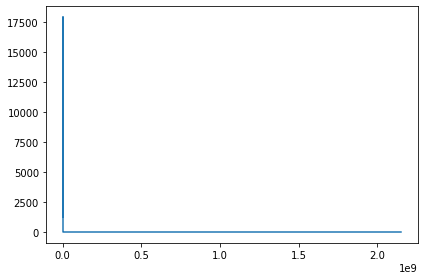

In [ ]:
plot_dict = train.loc[:,'familysize'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
plt.plot(x_values,y_values)
plt.tight_layout()
plt.show()

[1217, 6535, 17918, 11256, 4907, 1962, 838, 387, 221, 126, 59, 106]


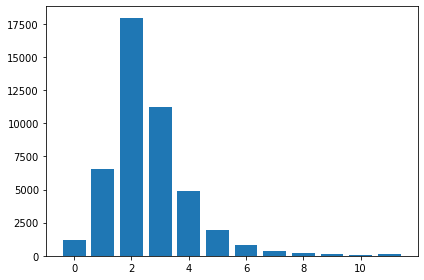

In [ ]:
train.familysize = train.familysize.apply(lambda x : 11 if x >= 11 else x) # 
plot_dict = train.loc[:,'familysize'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
print(y_values)
plt.bar(x_values,y_values)
plt.tight_layout()
plt.show()

#### mean 인코딩 후 데이터 합치기

In [ ]:
# mean encoding
mean_df = train.groupby('familysize')['voted'].agg('mean') # groupby('engnat')으로 그룹 객체 만들고 그중['voted'] 열에만 agg('mean')로 각 원소에 mean 함수 적용
display(mean_df)


## 인코딩된 데이터 train, test 데이터에 매핑
display(train['familysize'].map(mean_df)) # 매핑 확인 출력
final_train['familysize'] = train['familysize'].map(mean_df) # final_train 대입
final_test['familysize'] = train['familysize'].map(mean_df) # final_test 대입

familysize
0     0.586689
1     0.575669
2     0.549894
3     0.543088
4     0.516609
5     0.518349
6     0.535800
7     0.480620
8     0.561086
9     0.523810
10    0.525424
11    0.452830
Name: voted, dtype: float64

0        0.516609
1        0.543088
2        0.543088
3        0.586689
4        0.549894
           ...   
45527    0.575669
45528    0.549894
45529    0.575669
45530    0.549894
45531    0.543088
Name: familysize, Length: 45532, dtype: float64

In [ ]:
'''mean_df = train.groupby('familysize')['voted'].agg('mean')
display(mean_df)
final_train['familysize'] = train['familysize'].map(mean_df)

final_test.familysize = final_test.familysize.apply(lambda x : 11 if x >= 11 else x)
final_test['familysize'] = final_test['familysize'].map(mean_df)'''

"mean_df = train.groupby('familysize')['voted'].agg('mean')\ndisplay(mean_df)\nfinal_train['familysize'] = train['familysize'].map(mean_df)\n\nfinal_test.familysize = final_test.familysize.apply(lambda x : 11 if x >= 11 else x)\nfinal_test['familysize'] = final_test['familysize'].map(mean_df)"

# Gender
- LabelEncoder 변환: (Female =0, Male = 1) 

In [ ]:
# age_group 라벨 인코딩하고 시각화
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # 라벨 인코더 


# 인코딩 후 대입
le.fit(train['gender'])
final_train['gender'] = le.transform(train['gender']) # train 라벨 인코딩 변환 , 대입
final_test['gender'] = le.transform(test['gender']) # test 라벨 인코딩 변환 ,대입

display(le.classes_) # 인코딩 클래스 출력
display(final_train['gender'].head(5)) # 데이터 대입 확인



array(['Female', 'Male'], dtype=object)

0    0
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

In [ ]:
'''encoder = OneHotEncoder()
encoded = encoder.fit_transform(train[['gender']]).toarray()
final_train['gender_0'] = encoded[:,0]
final_train['gender_1'] = encoded[:,1]
final_train = final_train.drop(columns = ['gender'])

encoded = encoder.transform(test[['gender']]).toarray()
final_test['gender_0'] = encoded[:,0]
final_test['gender_1'] = encoded[:,1]
final_test = final_test.drop(columns = ['gender'])'''

"encoder = OneHotEncoder()\nencoded = encoder.fit_transform(train[['gender']]).toarray()\nfinal_train['gender_0'] = encoded[:,0]\nfinal_train['gender_1'] = encoded[:,1]\nfinal_train = final_train.drop(columns = ['gender'])\n\nencoded = encoder.transform(test[['gender']]).toarray()\nfinal_test['gender_0'] = encoded[:,0]\nfinal_test['gender_1'] = encoded[:,1]\nfinal_test = final_test.drop(columns = ['gender'])"

# Hand
- 필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)
- mean encoder 변환

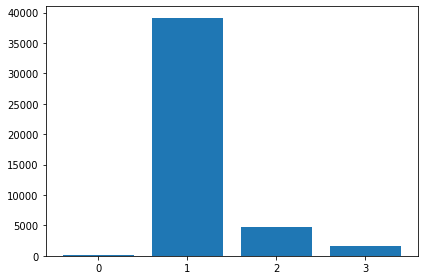

In [ ]:
plot_dict = train.loc[:,'hand'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
x_names = ['0','1','2','3']
plt.bar(x_names,y_values)
plt.tight_layout()
plt.show()

#### mean 인코딩 후 데이터 합치기

In [ ]:
# mean encoding
mean_df = train.groupby('hand')['voted'].agg('mean') # groupby('hand')으로 그룹 객체 만들고 그중['voted'] 열에만 agg('mean')로 각 원소에 mean 함수 적용
display(mean_df)


## 인코딩된 데이터 train, test 데이터에 매핑
display(train['hand'].map(mean_df)) # 매핑 확인 출력
final_train['hand'] = train['hand'].map(mean_df) # final_train 대입
final_test['hand'] = train['hand'].map(mean_df) # final_test 대입

hand
0    0.633540
1    0.545317
2    0.540494
3    0.592844
Name: voted, dtype: float64

0        0.545317
1        0.545317
2        0.545317
3        0.545317
4        0.545317
           ...   
45527    0.592844
45528    0.545317
45529    0.545317
45530    0.592844
45531    0.545317
Name: hand, Length: 45532, dtype: float64

In [ ]:
'''mean_df = train.groupby('hand')['voted'].agg('mean')
display(mean_df)
final_train['hand'] = train['hand'].map(mean_df)
final_test['hand'] = test['hand'].map(mean_df)'''

"mean_df = train.groupby('hand')['voted'].agg('mean')\ndisplay(mean_df)\nfinal_train['hand'] = train['hand'].map(mean_df)\nfinal_test['hand'] = test['hand'].map(mean_df)"

# Married
- 혼인 상태 (1=미혼, 2=기혼, 3=이혼, 0=그 외)
- mean encoder 변환

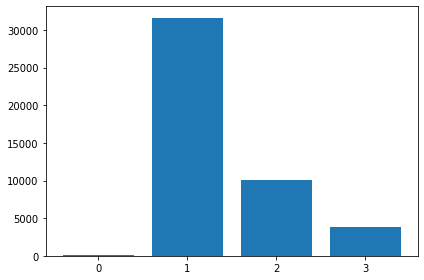

In [ ]:
plot_dict = train.loc[:,'married'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
x_names = ['0','1','2','3']
plt.bar(x_names,y_values)
plt.tight_layout()
plt.show()

#### mean 인코딩 후 데이터 합치기

In [ ]:
# mean encoding
mean_df = train.groupby('married')['voted'].agg('mean') # groupby('hand')으로 그룹 객체 만들고 그중['voted'] 열에만 agg('mean')로 각 원소에 mean 함수 적용
display(mean_df)


## 인코딩된 데이터 train, test 데이터에 매핑
display(train['married'].map(mean_df)) # 매핑 확인 출력
final_train['married'] = train['married'].map(mean_df) # final_train 대입
final_test['married'] = train['married'].map(mean_df) # final_test 대입

married
0    0.677419
1    0.629572
2    0.333433
3    0.422454
Name: voted, dtype: float64

0        0.422454
1        0.629572
2        0.333433
3        0.629572
4        0.333433
           ...   
45527    0.629572
45528    0.629572
45529    0.629572
45530    0.629572
45531    0.629572
Name: married, Length: 45532, dtype: float64

In [ ]:
'''mean_df = train.groupby('married')['voted'].agg('mean')
display(mean_df)
final_train['married'] = train['married'].map(mean_df)
final_test['married'] = test['married'].map(mean_df)'''

"mean_df = train.groupby('married')['voted'].agg('mean')\ndisplay(mean_df)\nfinal_train['married'] = train['married'].map(mean_df)\nfinal_test['married'] = test['married'].map(mean_df)"

# Race :  (Asian, Arab, Black, Indigenous Australian, Native American, White, Other)
- 인종
- mean encoder 변환

#### race , voted 시각화

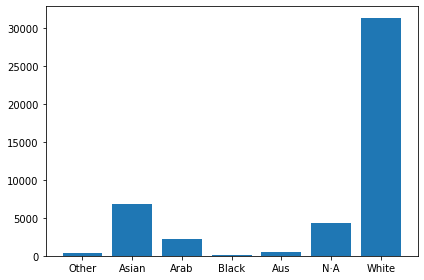

In [ ]:
plot_dict = train.loc[:,'race'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
x_names = ['Other','Asian','Arab','Black','Aus','N·A', 'White']
plt.bar(x_names,y_values)
plt.tight_layout()
plt.show()

- 백인인종이 제일 많다

In [ ]:
'''
mean_df = train.groupby('race')['voted'].agg('mean')
display(mean_df)
final_train['race'] = train['race'].map(mean_df)
final_test['race'] = test['race'].map(mean_df)'''

"\nmean_df = train.groupby('race')['voted'].agg('mean')\ndisplay(mean_df)\nfinal_train['race'] = train['race'].map(mean_df)\nfinal_test['race'] = test['race'].map(mean_df)"

#### mean 인코딩 후 데이터 합치기

In [ ]:
# mean encoding
mean_df = train.groupby('race')['voted'].agg('mean') # groupby('hand')으로 그룹 객체 만들고 그중['voted'] 열에만 agg('mean')로 각 원소에 mean 함수 적용
display(mean_df)


## 인코딩된 데이터 train, test 데이터에 매핑
display(train['race'].map(mean_df)) # 매핑 확인 출력
final_train['race'] = train['race'].map(mean_df) # final_train 대입
final_test['race'] = train['race'].map(mean_df) # final_test 대입

race
Arab                     0.709402
Asian                    0.704565
Black                    0.597786
Indigenous Australian    0.547170
Native American          0.587591
Other                    0.622402
White                    0.495776
Name: voted, dtype: float64

0        0.495776
1        0.704565
2        0.495776
3        0.704565
4        0.495776
           ...   
45527    0.495776
45528    0.495776
45529    0.495776
45530    0.495776
45531    0.495776
Name: race, Length: 45532, dtype: float64

# religion 
: 종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other)
- mean encoder 변환

#### mean 인코딩 후 데이터 합치기

In [ ]:
# mean encoding
mean_df = train.groupby('religion')['voted'].agg('mean') # groupby('hand')으로 그룹 객체 만들고 그중['voted'] 열에만 agg('mean')로 각 원소에 mean 함수 적용
display(mean_df)


## 인코딩된 데이터 train, test 데이터에 매핑
display(train['religion'].map(mean_df)) # 매핑 확인 출력
final_train['religion'] = train['religion'].map(mean_df) # final_train 대입
final_test['religion'] = train['religion'].map(mean_df) # final_test 대입

religion
Agnostic                0.542602
Atheist                 0.572704
Buddhist                0.621176
Christian_Catholic      0.526512
Christian_Mormon        0.619159
Christian_Other         0.539615
Christian_Protestant    0.434667
Hindu                   0.613016
Jewish                  0.449692
Muslim                  0.687081
Other                   0.582809
Sikh                    0.641026
Name: voted, dtype: float64

0        0.582809
1        0.613016
2        0.582809
3        0.613016
4        0.542602
           ...   
45527    0.449692
45528    0.572704
45529    0.539615
45530    0.572704
45531    0.542602
Name: religion, Length: 45532, dtype: float64

# TP
#### tp__ : items were rated "I see myself as:" _ such that (문장에 대한 답을 적은 듯)
- tp01 : Extraverted, enthusiastic.
- tp02 : Critical, quarrelsome.
- tp03 : Dependable, self-disciplined.
- tp04 : Anxious, easily upset.
- tp05 : Open to new experiences, complex.
- tp06 : Reserved, quiet.
- tp07 : Sympathetic, warm.
- tp08 : Disorganized, careless.
- tp09 : Calm, emotionally stable.
- tp10 : Conventional, uncreative.

#### mean 인코딩 후 데이터 합치기

In [ ]:
tp_columns = [x for x in train.columns if x.startswith('tp')] # 반목문으로 'tp'로 시작하는 조건뭉 이용해서  tp_ 열 이름 추출
# x.startswith('tp') :  'tp'로 시작하는 조건문

# 반복문으로 각 tp_ 열 mean인코딩 후 데이터 합치기
for column in tp_columns:
    mean_df = train.groupby(column)['voted'].agg('mean') # mean 인코딩
    display(mean_df) # 인코딩 확인 
    final_train[column] = train[column].map(mean_df) # 인코딩 된 데이터 train 데이터에 매핑
    final_test[column] = test[column].map(mean_df) # 인코딩 된 데이터 test 데이터에 매핑

tp01
0    0.513694
1    0.527402
2    0.556811
3    0.569339
4    0.546610
5    0.544195
6    0.578878
7    0.547703
Name: voted, dtype: float64

tp02
0    0.576499
1    0.565378
2    0.554329
3    0.597807
4    0.530967
5    0.501873
6    0.475293
7    0.580952
Name: voted, dtype: float64

tp03
0    0.493127
1    0.525133
2    0.576963
3    0.592880
4    0.594868
5    0.603181
6    0.647516
7    0.609418
Name: voted, dtype: float64

tp04
0    0.627368
1    0.574200
2    0.542448
3    0.554717
4    0.526083
5    0.516696
6    0.502543
7    0.617910
Name: voted, dtype: float64

tp05
0    0.531448
1    0.530590
2    0.569003
3    0.606909
4    0.561082
5    0.567176
6    0.621302
7    0.567010
Name: voted, dtype: float64

tp06
0    0.587522
1    0.566551
2    0.547168
3    0.552109
4    0.524395
5    0.514365
6    0.480574
7    0.589831
Name: voted, dtype: float64

tp07
0    0.492101
1    0.522457
2    0.551846
3    0.575017
4    0.585181
5    0.609779
6    0.669510
7    0.584570
Name: voted, dtype: float64

tp08
0    0.646671
1    0.609545
2    0.570918
3    0.575284
4    0.550785
5    0.508754
6    0.473319
7    0.589552
Name: voted, dtype: float64

tp09
0    0.514036
1    0.506460
2    0.541111
3    0.567209
4    0.565107
5    0.606215
6    0.670766
7    0.559441
Name: voted, dtype: float64

tp10
0    0.581604
1    0.556572
2    0.542523
3    0.583128
4    0.548939
5    0.538778
6    0.535585
7    0.598361
Name: voted, dtype: float64

# urban
- 0 = 무응답, 1 = 지방, 2 = 수도권, 3 = 도시
- mean encoder 변환

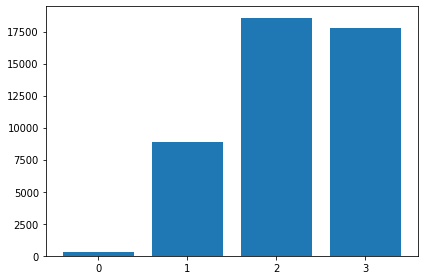

In [ ]:
plot_dict = train.loc[:,'urban'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
x_names = ['0','1','2','3']
plt.bar(x_names,y_values)
plt.tight_layout()
plt.show()

#### mean 인코딩 후 데이터 합치기

In [ ]:
# mean encoding
mean_df = train.groupby('urban')['voted'].agg('mean') # groupby('hand')으로 그룹 객체 만들고 그중['voted'] 열에만 agg('mean')로 각 원소에 mean 함수 적용
display(mean_df)


## 인코딩된 데이터 train, test 데이터에 매핑
display(train['urban'].map(mean_df)) # 매핑 확인 출력
final_train['urban'] = train['urban'].map(mean_df) # final_train 대입
final_test['urban'] = train['urban'].map(mean_df) # final_test 대입

urban
0    0.490683
1    0.492872
2    0.541545
3    0.580402
Name: voted, dtype: float64

0        0.492872
1        0.580402
2        0.541545
3        0.580402
4        0.492872
           ...   
45527    0.580402
45528    0.492872
45529    0.541545
45530    0.490683
45531    0.541545
Name: urban, Length: 45532, dtype: float64

In [ ]:
'''column = 'urban'
mean_df = train.groupby(column)['voted'].agg('mean')
display(mean_df)
final_train[column] = train[column].map(mean_df)
final_test[column] = test[column].map(mean_df)'''

"column = 'urban'\nmean_df = train.groupby(column)['voted'].agg('mean')\ndisplay(mean_df)\nfinal_train[column] = train[column].map(mean_df)\nfinal_test[column] = test[column].map(mean_df)"

# Wr_ 

- wr_(01~13) : 실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)  
- wf_(01~03) : 허구인 단어의 정의를 앎 (1=Yes, 0=No)


#### wr_ Wf_ 데이터는 0과 1 로 이루어져 있기 때문에 전처리를 하지 않음

In [ ]:
'''wr_columns = [x for x in train.columns if x.startswith('wr')]
for column in wr_columns:
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(train[[column]]).toarray()
    final_train[column+'_0'] = encoded[:,0]
    final_train[column+'_1'] = encoded[:,1]
    final_train = final_train.drop(columns = [column])

    encoded = encoder.transform(test[[column]]).toarray()
    final_test[column+'_0'] = encoded[:,0]
    final_test[column+'_1'] = encoded[:,1]
    final_test = final_test.drop(columns = [column])'''

"wr_columns = [x for x in train.columns if x.startswith('wr')]\nfor column in wr_columns:\n    encoder = OneHotEncoder()\n    encoded = encoder.fit_transform(train[[column]]).toarray()\n    final_train[column+'_0'] = encoded[:,0]\n    final_train[column+'_1'] = encoded[:,1]\n    final_train = final_train.drop(columns = [column])\n\n    encoded = encoder.transform(test[[column]]).toarray()\n    final_test[column+'_0'] = encoded[:,0]\n    final_test[column+'_1'] = encoded[:,1]\n    final_test = final_test.drop(columns = [column])"

# Wf_

- wf_(01~03) : 허구인 단어의 정의를 앎 (1=Yes, 0=No)

In [ ]:
'''wf_columns = [x for x in train.columns if x.startswith('wf')]
for column in wf_columns:
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(train[[column]]).toarray()
    final_train[column+'_0'] = encoded[:,0]
    final_train[column+'_1'] = encoded[:,1]
    final_train = final_train.drop(columns = [column+''])

    encoded = encoder.transform(test[[column]]).toarray()
    final_test[column+'_0'] = encoded[:,0]
    final_test[column+'_1'] = encoded[:,1]
    final_test = final_test.drop(columns = [column])'''

"wf_columns = [x for x in train.columns if x.startswith('wf')]\nfor column in wf_columns:\n    encoder = OneHotEncoder()\n    encoded = encoder.fit_transform(train[[column]]).toarray()\n    final_train[column+'_0'] = encoded[:,0]\n    final_train[column+'_1'] = encoded[:,1]\n    final_train = final_train.drop(columns = [column+''])\n\n    encoded = encoder.transform(test[[column]]).toarray()\n    final_test[column+'_0'] = encoded[:,0]\n    final_test[column+'_1'] = encoded[:,1]\n    final_test = final_test.drop(columns = [column])"

# 전처리 된 final_train ,final_test 데이터 확인

In [ ]:
final_train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,0.563033,0.000140,0.557456,0.000241,0.574759,0.001115,0.549449,0.000643,0.538197,0.000808,0.522300,0.000044,0.53021,0.000525,0.565925,0.000010,0.502607,0.000067,0.539209,0.000130,0.541250,0.000183,0.529442,0.000011,0.498594,0.000059,0.517668,0.001304,0.513205,0.000442,0.514485,0.000199,0.578074,0.000086,0.541311,0.000027,0.520566,0.000473,0.469089,0.000094,0.411179,0.632967,0.537397,0.516609,0,0.545317,0.422454,0.495776,0.582809,0.556811,0.554329,0.576963,0.574200,0.569003,0.566551,0.584570,0.550785,0.565107,0.583128,0.492872,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,0.500437,0.000258,0.627831,0.000231,0.570634,0.003858,0.544993,0.001895,0.537259,0.002237,0.585859,0.000184,0.56513,0.000750,0.514670,0.000038,0.502607,0.000110,0.578543,0.000128,0.506491,0.000610,0.529442,0.000050,0.467587,0.000305,0.517668,0.002972,0.498814,0.000927,0.603592,0.000519,0.454372,0.000317,0.572475,0.000095,0.538763,0.003326,0.469089,0.000114,0.469671,0.380316,0.571394,0.543088,0,0.545317,0.629572,0.704565,0.613016,0.527402,0.565378,0.493127,0.627368,0.530590,0.547168,0.575017,0.550785,0.514036,0.548939,0.580402,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,0.494825,0.000662,0.487898,0.000261,0.499742,0.001143,0.561308,0.002156,0.538739,0.000681,0.568371,0.000043,0.52278,0.001069,0.514670,0.000009,0.596880,0.000156,0.495968,0.000158,0.506491,0.000207,0.555001,0.000033,0.498594,0.000063,0.503868,0.003508,0.513205,0.000996,0.483372,0.000243,0.454372,0.000219,0.520620,0.000041,0.491370,0.000890,0.469089,0.000120,0.411179,0.403494,0.537397,0.543088,1,0.545317,0.333433,0.495776,0.582809,0.556811,0.597807,0.525133,0.516696,0.606909,0.524395,0.551846,0.473319,0.506460,0.583128,0.541545,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,0.563033,0.000198,0.561204,0.000410,0.530138,0.001110,0.548998,0.002073,0.537259,0.000173,0.523605,0.000127,0.52278,0.000125,0.594746,0.000021,0.502607,0.000165,0.539209,0.000566,0.591645,0.000667,0.529442,0.000016,0.553238,0.000639,0.503868,0.001963,0.540300,0.000893,0.561011,0.005132,0.563144,0.000136,0.520620,0.000279,0.538763,0.001840,0.597725,0.000111,0.469671,0.380316,0.571394,0.586689,0,0.545317,0.629572,0.704565,0.613016,0.556811,0.530967,0.525133,0.574200,0.530590,0.552109,0.522457,0.575284,0.506460,0.583128,0.580402,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,0.564892,0.000374,0.487898,0.000122,0.574759,0.000609,0.537439,0.000667,0.537259,0.000515,0.523605,0.000051,0.56513,0.000904,0.514670,0.000012,0.502607,0.000068,0.596835,0.000140,0.506491,0.000153,0.555001,0.000015,0.553238,0.000037,0.546196,0.000907,0.498814,0.000576,0.561011,0.000245,0.454372,0.000076,0.527810,0.000033,0.491370,0.000434,0.519367,0.000161,0.469671,0.403494,0.537397,0.549894,1,0.545317,0.333433,0.495776,0.542602,0.527402,0.565378,0.525133,0.502543,0.531448,0.547168,0.492101,0.473319,0.541111,0.535585,0.492872,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
final_test.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,0.563033,0.004731,0.522095,0.000541,0.570634,0.000127,0.549449,0.002443,0.538197,0.001595,0.515232,0.004085,0.53372,0.002708,0.558376,0.005503,0.531064,0.000162,0.495968,0.002680,0.506491,0.000408,0.559207,0.001027,0.563659,0.009529,0.517668,0.005599,0.560556,0.000527,0.561011,0.001121,0.563144,0.000526,0.520620,0.000121,0.491370,0.003887,0.519367,0.001211,0.837214,0.632967,0.537397,0.516609,1,0.545317,0.422454,0.495776,0.582809,0.556811,0.565378,0.525133,0.526083,0.530590,0.547168,0.551846,0.575284,0.565107,0.548939,0.492872,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,0.563033,0.003252,0.522095,0.000357,0.570634,0.000042,0.548998,0.000401,0.534566,0.000709,0.568371,0.000779,0.53021,0.000434,0.514670,0.008788,0.502607,0.000232,0.578543,0.000524,0.506491,0.000127,0.555001,0.000558,0.563659,0.012516,0.578459,0.002477,0.513205,0.000450,0.588181,0.000779,0.484087,0.000241,0.527810,0.000114,0.543511,0.000683,0.565911,0.000517,0.837214,0.380316,0.571394,0.543088,1,0.545317,0.629572,0.704565,0.613016,0.547703,0.580952,0.609418,0.617910,0.567010,0.589831,0.584570,0.589552,0.559441,0.598361,0.580402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.563033,0.003158,0.522095,0.000460,0.530138,0.000012,0.537439,0.000297,0.538197,0.000821,0.523605,0.000988,0.56513,0.000583,0.514670,0.004810,0.555589,0.000341,0.539209,0.000224,0.541250,0.000327,0.555001,0.000458,0.553238,0.001571,0.546196,0.002705,0.608421,0.000301,0.588181,0.001888,0.563144,0.000466,0.520620,0.000327,0.543511,0.001227,0.597725,0.000795,0.411179,0.403494,0.537397,0.543088,1,0.545317,0.333433,0.495776,0.582809,0.578878,0.554329,0.592880,0.627368,0.621302,0.566551,0.551846,0.570918,0.565107,0.556572,0.541545,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,0.564892,0.004284,0.487898,0.000190,0.574759,0.000039,0.537439,0.001125,0.538739,0.001585,0.568371,0.000745,0.56513,0.000540,0.514670,0.010722,0.583262,0.000140,0.461014,0.000413,0.591645,0.000483,0.555001,0.000341,0.553238,0.001585,0.578459,0.001795,0.513205,0.000491,0.561011,0.001120,0.454372,0.000710,0.572475,0.000097,0.538763,0.001245,0.469089,0.000922,0.271357,0.380316,0.571394,0.586689,1,0.545317,0.629572,0.704565,0.613016,0.513694,0.501873,0.525133,0.502543,0.531448,0.480574,0.492101,0.508754,0.506460,0.535585,0.580402,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,0.540892,0.003152,0.487898,0.000226,0.574759,0.000023,0.537439,0.000829,0.538197,0.000567,0.523605,0.000532,0.53372,0.000252,0.514670,0.003633,0.555589,0.000145,0.578543,0.000323,0.506491,0.000201,0.529442,0.000630,0.498594,0.002608,0.503868,0.002088,0.513205,0.000356,0.561011,0.000458,0.563144,0.000343,0.520620,0.000109,0.538763,0.000564,0.559764,0.001458,0.837214,0.403494,0.537397,0.549894,1,0.545317,0.333433,0.495776,0.542602,0.578878,0.565378,0.576963,0.542448,0.606909,0.587522,0.609779,0.570918,0.565107,0.583128,0.492872,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1


In [ ]:
print(final_train.shape)
print(final_test.shape)
print(sample_submission.shape)

(45532, 78)
(11383, 77)
(11383, 2)


In [ ]:
#최종 전처리 완료된 학습데이터에서 타겟변수인 'voted'를 분리시켜 x와 y로 나눠줍니다.
final_train_x = final_train.drop('voted', axis=1)
final_train_y = final_train['voted']

In [ ]:
''' 최종 전처리 완료된 데이터 따로 저장하고 싶으면 실행!
final_train_x.to_csv('심리 성향 예측_final_train_x.csv', index=False)
final_train_y.to_csv('심리 성향 예측_final_train_y.csv', index=False)
final_test.to_csv('심리 성향 예측_final_test.csv', index=False)
'''

" 최종 전처리 완료된 데이터 따로 저장하고 싶으면 실행!\nfinal_train_x.to_csv('심리 성향 예측_final_train_x.csv', index=False)\nfinal_train_y.to_csv('심리 성향 예측_final_train_y.csv', index=False)\nfinal_test.to_csv('심리 성향 예측_final_test.csv', index=False)\n"

# 모델 실험 단계

### **1. 간단한 LGBM 모델**

public(0.5788903241) 

private(0.5750718696)

참고 : [코드 공유](https://dacon.io/competitions/official/235647/codeshare/1700?page=1&dtype=recent)


먼저 베이스라인 코드로 제시된 글에서 쓰인 모델을 써봤습니다.

**Light GBM**은 Tree가 수직적으로 확장(leaf-wise)되는 반면에, 다른 알고리즘은 Tree가 수평적으로 확장(level-wise)됩니다. 

즉, 동일한 leaf를 확장할 때 Light GBM은 더 많은 손실(loss)을 줄일 수 있습니다.

- 장점 : 큰 사이즈의 데이터를 다룰 때 속도가 빠르고, 실행 시 적은 메모리를 차지합니다.

- 단점 : 과적합에 민감하여 작은 사이즈의 데이터에는 적합하지 않습니다.

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=500) # n_estimators는 너무 커지면 과적합이 발생합니다. 우선은 다른 파라미터는 건드리지 않았습니다.
model.fit(final_train_x, final_train_y)  # 모델 학습
final_pred = model.predict(final_test)   # 예측
sample_submission['voted']=final_pred    # 저장
sample_submission.to_csv('test_submit_LGBM_basic.csv', index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **2. NN 모델**

제출 횟수 제한 때문에 다양한 파라미터 실험은 못해봤지만, 비교적 성능이 안좋아서 제외 시켰습니다.

하지만 코드 공유에서 대다수를 차지하는 보편적인 모델입니다.

### **3. CAT+LGBM+XGB 앙상블 모델**

public(0.5890179708)

private(0.5922709518)

생각보다는 좋지 않았지만 그래도 private에서 점수가 더 높아지는 것을 보니 앙상블 한 것이 효과를 본 것 같다.

참고 : [코드 공유](https://dacon.io/competitions/official/235647/codeshare/1821?page=1&dtype=recent)

코드 공유 중에 부스팅 계열의 세가지 모델을 앙상블 한 것이 있어서 사용해 봤습니다.

**XGBoost Classifier + Light GBM Classifier + CatBoostClassifier**

- XGBoost Classifier는 분류 정확도는 우수하나, Outlier에 취약합니다. 과적합 방지 기능을 하는 규제가 포함 되어 있습니다.

- Light GBM Classifier는 위의 베이스라인 코드에서 사용한 모델입니다.

- CatBoostClassifier는 기본 파라미터 최적화가 잘 되어있어 두 모델에 비해서는 복잡한 하이퍼 파라미터 튜닝을 필요로 하지는 않습니다. 학습 데이터에 대한 샘플링을 통해 모델을 만들고, 샘플링이 되지 않은 데이터의 잔차를 추정하면서 학습 합니다.

In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier

In [ ]:
# 모델에 넣을 하이퍼파라미터를 미리 설정해줍니다. 
params =  {'colsample_bylevel': 0.92859, 'colsample_bytree': 0.55352, 'eta': 0.015, 'gamma': 0.62587, 'min_child_weight': 48.0, 'reg_alpha': 0.54, 'reg_lambda': 1.062, 'subsample': 0.89}  
params['min_child_weight'] = int(params['min_child_weight'])

model = XGBClassifier(
             **params,
             max_depth=11,
             booster='gbtree',
             n_estimators=5000,
             objective= 'binary:logistic',
             eval_metric='auc',
             n_jobs= -1,
             scale_pos_weight= 1.206,
             random_state= 55 
)

# XGBoost 분류 모델로 학습 및 예측
model.fit(final_train_x, final_train_y)
XGBC_final_pred = model.predict(final_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 모델에 넣을 하이퍼파라미터를 미리 설정해줍니다. 
params = {'colsample_bytree': 0.675479, 'learning_rate': 0.00645, 'max_depth': 10.3, 'min_child_samples': 88.41, 'min_child_weight': 28.4, 'min_split_gain': 0.025029, 'num_leaves': 86.2, 'reg_alpha': 0.544736, 'reg_lambda': 0.15015, 'subsample': 0.7295}

params['num_leaves'] = int(params['num_leaves'])
params['max_depth'] = int(params['max_depth'])
params['min_child_samples'] = int(params['min_child_samples'])

model = LGBMClassifier(
        **params,
        objective= 'binary',
        subsample_for_bin= 240000,
        is_unbalance= False,
        n_estimators=10000,
        n_jobs=-1,
        silent= -1,
        verbose= -1,
        random_state=55     
)

# LGBM 분류 모델로 학습 및 예측
model.fit(final_train_x, final_train_y)
LGBM_final_pred = model.predict(final_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 모델에 넣을 하이퍼파라미터를 미리 설정해줍니다. 
params = {'bagging_temperature': 0.375906, 'depth': 9.0, 'l2_leaf_reg': 68.8, 'learning_rate': 0.011, 'od_wait': 138.699, 'subsample': 0.76046}

params['depth'] = int(params['depth'])
params['l2_leaf_reg'] = int(params['l2_leaf_reg'])
params['od_wait'] = int(params['od_wait'])

model = CatBoostClassifier(
                          **params,
                          iterations=5000,
                          eval_metric='AUC',
                          allow_writing_files=False,
                          od_type='Iter',
                          random_state=55)

# CatBoost 분류 모델로 학습 및 예측
model.fit(final_train_x, final_train_y)
CatBoost_final_pred = model.predict(final_test)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0:	total: 174ms	remaining: 14m 28s
1:	total: 259ms	remaining: 10m 47s
2:	total: 342ms	remaining: 9m 29s
3:	total: 425ms	remaining: 8m 51s
4:	total: 510ms	remaining: 8m 29s
5:	total: 596ms	remaining: 8m 15s
6:	total: 680ms	remaining: 8m 5s
7:	total: 765ms	remaining: 7m 57s
8:	total: 855ms	remaining: 7m 54s
9:	total: 946ms	remaining: 7m 51s
10:	total: 1.03s	remaining: 7m 46s
11:	total: 1.11s	remaining: 7m 40s
12:	total: 1.2s	remaining: 7m 41s
13:	total: 1.29s	remaining: 7m 38s
14:	total: 1.37s	remaining: 7m 35s
15:	total: 1.46s	remaining: 7m 34s
16:	total: 1.54s	remaining: 7m 32s
17:	total: 1.63s	remaining: 7m 29s
18:	total: 1.71s	remaining: 7m 28s
19:	total: 1.79s	remaining: 7m 27s
20:	total: 1.87s	remaining: 7m 24s
21:	total: 1.96s	remaining: 7m 23s
22:	total: 2.04s	remaining: 7m 21s
23:	total: 2.12s	remaining: 7m 19s
24:	total: 2.21s	remaining: 7m 19s
25:	total: 2.29s	remaining: 7m 18s
26:	total: 2.37s	remaining: 7m 17s
27:	total: 2.47s	remaining: 7

In [ ]:
# 세 모델에서 얻은 예측값들에 적당한 가중치를 주어 앙상블 합니다.
ensemble_preds = (CatBoost_final_pred * 0.55) + (XGBC_final_pred * 0.37) + (LGBM_final_pred * 0.08)

#앙상블 한 예측값을 저장합니다.
sample_submission['voted']= ensemble_preds
sample_submission['voted'] = sample_submission['voted'].astype('int') #결과가 실수 형태로 나오는 것이 있어 int형으로 바꿔줍니다.
sample_submission.to_csv('test_submit_CAT+XGB+LGBM.csv', index=False)

### **4. Auto ML 모델**

public(0.6220532941) 657등

private(0.6227340114)

참고 : [코드 공유](https://dacon.io/competitions/official/235647/codeshare/1720?page=3&dtype=recent)



**Auto ML** 분야는 여러 종류가 있는데요. 

그 중 Hyperparameter Optimization 분야에서 **Bayesian Optimization**(베이지안 최적화, 베이즈 최적화)를 사용한 코드가 있어 참고해 봤습니다.

Bayesian Optimization는 하이퍼 파라미터 튜닝에서 기존의 grid search, random search를 대체하는데 사용 가능합니다.

즉, 기본 모델로는 LGBM을 사용하고 그 최적의 하이퍼파라미터 값을 **Bayesian Optimization** 방법으로 찾아내는 모델입니다!

In [ ]:
#BayesianOptimization를 import 하기위해 필요한 설치 과정
pip install bayesian-optimization 

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=ad9b7e79c05ca5a0bce82fa92354cd4d79ea0144c60395b821972e459b11f18f
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
import lightgbm as lgbm
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate

In [ ]:
# 목적 함수 생성
# 목적 함수란 사용할 LGBMClassifier 모델의 성능 함수로 모델의 파라미터 조합을 입력값으로 가집니다. 성능평가는 auc이므로 score값을 return 해 줍니다.
# 최적의 값을 탐색하고자 하는 파리미터를 함수에 입력해줍니다.

def lgbm_cv(learning_rate, num_leaves, max_depth, min_child_weight, colsample_bytree, feature_fraction, bagging_fraction, lambda_l1, lambda_l2):
    model = lgbm.LGBMClassifier(learning_rate=learning_rate,
                                n_estimators = 300,
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)),
                                min_child_weight = int(round(min_child_weight)),
                                colsample_bytree = colsample_bytree,
                                feature_fraction = max(min(feature_fraction, 1), 0),
                                bagging_fraction = max(min(bagging_fraction, 1), 0),
                                lambda_l1 = max(lambda_l1, 0),
                                lambda_l2 = max(lambda_l2, 0)
                               )
    scoring = {'roc_auc_score': make_scorer(roc_auc_score)}
    result = cross_validate(model, final_train_x, final_train_y, cv=5, scoring=scoring)
    auc_score = result["test_roc_auc_score"].mean()
    return auc_score

In [ ]:
# 파라미터의 탐색 대상 구간을 설정 합니다.
pbounds = {'learning_rate' : (0.0001, 0.05),    # learning_rate : 보통 0.01~ 정도로 설정합니다. 세부 조정을 위해서는 0.0001~정도로 설정해도 무방합니다.
           'num_leaves': (300, 600),            # num_leaves : 250정도로 설정해도 무방합니다. 300~600 정도로 설정했습니다.
           'max_depth': (2, 25),                # max_depth : -1 로 설정하면 무한대로 트리가 길어집니다. 9~ 정도로 설정하는게 무방하나 조금 더 넓은 범위로 설정했습니다.
           'min_child_weight': (30, 100),        
           'colsample_bytree': (0, 0.99),
           'feature_fraction': (0.0001, 0.99),  # feature_fraction, bagging_fraction : 0과 1 사이의 범위로 설정했습니다.
           'bagging_fraction': (0.0001, 0.99),
           'lambda_l1' : (0, 0.99),
           'lambda_l2' : (0, 0.99),
          }

In [ ]:
#객체 생성
lgbmBO = BayesianOptimization(f = lgbm_cv, pbounds = pbounds, verbose = 2, random_state = 0 ) #f는 목적 함수, pbounds는 입력값의 탐색 구간

In [ ]:
# 반복적으로 베이지안 최적화 수행
lgbmBO.maximize(init_points=5, n_iter = 20, acq='ei', xi=0.01)

|   iter    |  target   | baggin... | colsam... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  1        |  0.6853   |  0.5434   |  0.708    |  0.5968   |  0.5394   |  0.4194   |  0.03233  |  12.06    |  92.42    |  589.1    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  2        |  0.6843   |  0.3797   |  0.7838   |  0.5237   |  0.5624   |  0.9163   |  0.003645 |  4.004    |  31.42    |  549.8    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  3        |  0.6805   |  0.7704   |  0.8613   |  0.9688   |  0.7912   |  0.4569   |  0.03905  |  4.72     |  74.79    |  343.0    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  4        |  0.658    |  0.9352   |  0.5166   |  0.4106   |  0.2619   |  0.7665   |  0.02286  |  15.07    |  31.32    |  485.3    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  5        |  0.6583   |  0.606    |  0.6108   |  0.9343   |  0.675    |  0.3559   |  0.02191  |  18.05    |  34.22    |  500.0    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  6        |  0.6897   |  0.7264   |  0.8566   |  0.6001   |  0.9791   |  0.7416   |  0.01211  |  2.361    |  34.99    |  599.3    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  7        |  0.6916   |  0.2944   |  0.6667   |  0.7443   |  0.7415   |  0.09578  |  0.02954  |  2.1      |  99.88    |  547.4    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  8        |  0.6936   |  0.473    |  0.6159   |  0.8182   |  0.7594   |  0.69     |  0.01599  |  3.185    |  98.04    |  301.8    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  9        |  0.692    |  0.5624   |  0.5421   |  0.9327   |  0.9215   |  0.3094   |  0.009335 |  2.494    |  32.29    |  304.2    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  10       |  0.6916   |  0.8211   |  0.9149   |  0.7145   |  0.9037   |  0.7523   |  0.03013  |  2.171    |  99.49    |  596.9    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  11       |  0.6793   |  0.3868   |  0.6453   |  0.1738   |  0.586    |  0.435    |  0.04782  |  24.97    |  75.26    |  301.0    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  12       |  0.69     |  0.1633   |  0.4893   |  0.2818   |  0.6839   |  0.1083   |  0.0107   |  10.17    |  98.01    |  305.9    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  13       |  0.644    |  0.7841   |  0.533    |  0.01418  |  0.895    |  0.4813   |  0.04629  |  2.361    |  74.08    |  300.2    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  14       |  0.6604   |  0.8183   |  0.7035   |  0.8282   |  0.9124   |  0.1033   |  0.0131   |  23.84    |  30.22    |  345.5    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  15       |  0.6126   |  0.3521   |  0.9137   |  0.2123   |  0.3576   |  0.6584   |  0.002172 |  6.186    |  99.45    |  302.0    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  16       |  0.6904   |  0.2638   |  0.5232   |  0.3594   |  0.1616   |  0.4035   |  0.02906  |  2.436    |  97.45    |  324.0    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  17       |  0.6821   |  0.0001   |  0.0      |  0.99     |  0.99     |  0.0      |  0.05     |  25.0     |  100.0    |  454.3    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  18       |  0.6607   |  0.0001   |  0.0      |  0.99     |  0.99     |  0.0      |  0.05     |  2.0      |  30.0     |  413.8    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  19       |  0.5      |  0.99     |  0.0      |  0.99     |  0.0      |  0.99     |  0.0001   |  2.0      |  100.0    |  493.3    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  20       |  0.6809   |  0.0001   |  0.0      |  0.99     |  0.99     |  0.0      |  0.05     |  25.0     |  80.9     |  323.2    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  21       |  0.6882   |  0.99     |  0.0      |  0.99     |  0.99     |  0.0      |  0.05     |  2.0      |  100.0    |  410.3    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  22       |  0.6704   |  0.99     |  0.0      |  0.99     |  0.99     |  0.0      |  0.05     |  25.0     |  65.16    |  420.9    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  23       |  0.6607   |  0.0001   |  0.0      |  0.99     |  0.99     |  0.0      |  0.05     |  2.0      |  30.0     |  364.0    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  24       |  0.6882   |  0.0001   |  0.0      |  0.99     |  0.99     |  0.0      |  0.05     |  2.0      |  88.66    |  311.7    |


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

|  25       |  0.6821   |  0.99     |  0.0      |  0.99     |  0.99     |  0.0      |  0.05     |  25.0     |  100.0    |  368.2    |


In [ ]:
# 찾은 파라미터 값 확인
lgbmBO.max

{'params': {'bagging_fraction': 0.4729589655278779,
  'colsample_bytree': 0.6158738007642527,
  'feature_fraction': 0.8182268598478806,
  'lambda_l1': 0.7594444092904203,
  'lambda_l2': 0.6899513386599342,
  'learning_rate': 0.015987379446646303,
  'max_depth': 3.1851686676923165,
  'min_child_weight': 98.03887622366321,
  'num_leaves': 301.8072068585756},
 'target': 0.6935909482114496}

In [ ]:
#최적의 파라미터 적용
fit_lgbm = lgbm.LGBMClassifier(learning_rate=lgbmBO.max['params']['learning_rate'],
                               num_leaves = int(round(lgbmBO.max['params']['num_leaves'])),
                               max_depth = int(round(lgbmBO.max['params']['max_depth'])),
                               min_child_weight = int(round(lgbmBO.max['params']['min_child_weight'])),
                               colsample_bytree=lgbmBO.max['params']['colsample_bytree'],
                               feature_fraction = max(min(lgbmBO.max['params']['feature_fraction'], 1), 0),
                               bagging_fraction = max(min(lgbmBO.max['params']['bagging_fraction'], 1), 0),
                               lambda_l1 = lgbmBO.max['params']['lambda_l1'],
                               lambda_l2 = lgbmBO.max['params']['lambda_l2']
                               )

In [ ]:
# 이제 똑같이 모델 학습 및 예측을 진행 해 줍니다!
model = fit_lgbm.fit(final_train_x,final_train_y)
final_pred = model.predict(final_test)
sample_submission['voted']=final_pred
sample_submission.to_csv('test_submit_AUTO_ML.csv', index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
